In [7]:
import pandas   as pd
import numpy    as np
import matplotlib.pyplot as plt

In [8]:
# Load your processed features and target
X_train_full = np.load('data/processed/train_features_final.npy')
y_train_full = np.load('data/processed/train_target_final.npy')
X_test = np.load('data/processed/test_features_final.npy')

print(f"Original shapes:")
print(f"X_train: {X_train_full.shape}")
print(f"y_train: {y_train_full.shape}")
print(f"X_test: {X_test.shape}")


Original shapes:
X_train: (75000, 5109)
y_train: (75000,)
X_test: (75000, 5109)


In [9]:
# Check the range of y values to see if already log-transformed
print(f"\nTarget variable statistics:")
print(f"Min: {y_train_full.min():.4f}")
print(f"Max: {y_train_full.max():.4f}")
print(f"Mean: {y_train_full.mean():.4f}")
print(f"Median: {np.median(y_train_full):.4f}")

# If values are like 5-10, it's log-transformed
# If values are like 100-10000, it's NOT log-transformed



Target variable statistics:
Min: 0.1300
Max: 2796.0000
Mean: 23.6477
Median: 14.0000


In [10]:
# Your target is NOT log-transformed, so transform it now
y_train_log = np.log1p(y_train_full)

print(f"\nAfter log transformation:")
print(f"Min: {y_train_log.min():.4f}")
print(f"Max: {y_train_log.max():.4f}")
print(f"Mean: {y_train_log.mean():.4f}")
print(f"Median: {np.median(y_train_log):.4f}")



After log transformation:
Min: 0.1222
Max: 7.9363
Mean: 2.7392
Median: 2.7081


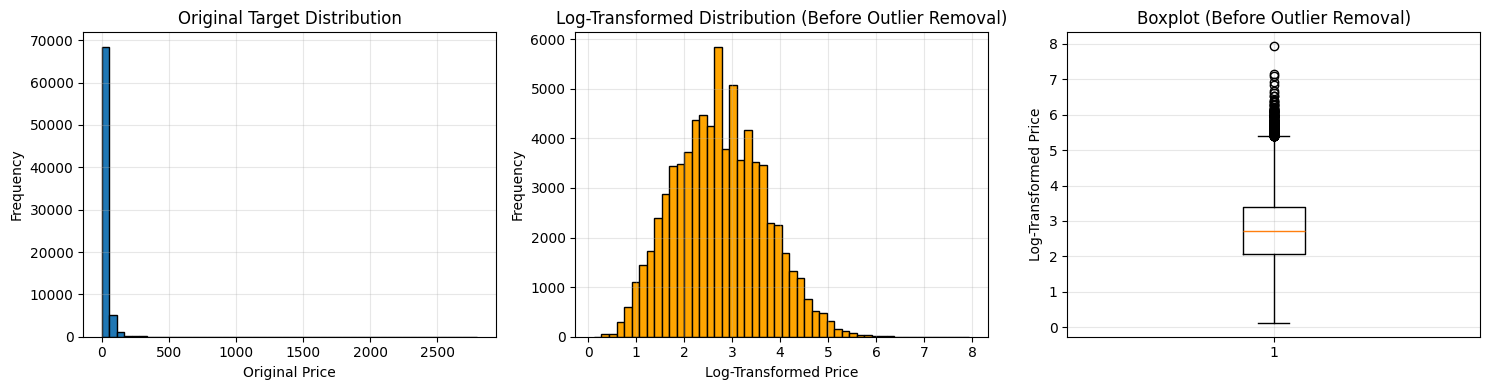

In [11]:
# Plot histogram to see distribution after log transform
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(y_train_full, bins=50, edgecolor='black')
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.title('Original Target Distribution')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(y_train_log, bins=50, edgecolor='black', color='orange')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution (Before Outlier Removal)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.boxplot(y_train_log)
plt.ylabel('Log-Transformed Price')
plt.title('Boxplot (Before Outlier Removal)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [12]:
# Calculate quartiles and IQR on LOG-TRANSFORMED target
Q1 = np.percentile(y_train_log, 25)
Q3 = np.percentile(y_train_log, 75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier Detection (on log-transformed target):")
print(f"Q1 (25th percentile): {Q1:.4f}")
print(f"Q3 (75th percentile): {Q3:.4f}")
print(f"IQR: {IQR:.4f}")
print(f"Lower bound: {lower_bound:.4f}")
print(f"Upper bound: {upper_bound:.4f}")

# Count outliers
outliers_below = np.sum(y_train_log < lower_bound)
outliers_above = np.sum(y_train_log > upper_bound)
total_outliers = outliers_below + outliers_above

print(f"\nOutliers below lower bound: {outliers_below}")
print(f"Outliers above upper bound: {outliers_above}")
print(f"Total outliers: {total_outliers} ({total_outliers/len(y_train_log)*100:.2f}%)")

# Show price ranges being removed
if outliers_above > 0:
    outlier_indices = y_train_log > upper_bound
    outlier_prices = y_train_full[outlier_indices]
    print(f"\nExtreme high prices being removed: ${outlier_prices.min():.2f} - ${outlier_prices.max():.2f}")

if outliers_below > 0:
    outlier_indices = y_train_log < lower_bound
    outlier_prices = y_train_full[outlier_indices]
    print(f"Extreme low prices being removed: ${outlier_prices.min():.2f} - ${outlier_prices.max():.2f}")



Outlier Detection (on log-transformed target):
Q1 (25th percentile): 2.0535
Q3 (75th percentile): 3.3886
IQR: 1.3351
Lower bound: 0.0508
Upper bound: 5.3913

Outliers below lower bound: 0
Outliers above upper bound: 242
Total outliers: 242 (0.32%)

Extreme high prices being removed: $218.76 - $2796.00


In [13]:
# Create mask for non-outliers (on log-transformed values)
outlier_mask = (y_train_log >= lower_bound) & (y_train_log <= upper_bound)

# Apply mask to features and BOTH original and log-transformed targets
X_train_clean = X_train_full[outlier_mask]
y_train_clean_log = y_train_log[outlier_mask]
y_train_clean_original = y_train_full[outlier_mask]

print(f"\nData after outlier removal:")
print(f"Original samples: {len(y_train_full)}")
print(f"Clean samples: {len(y_train_clean_log)}")
print(f"Removed samples: {len(y_train_full) - len(y_train_clean_log)}")
print(f"Percentage kept: {len(y_train_clean_log)/len(y_train_full)*100:.2f}%")

print(f"\nCleaned price range:")
print(f"Min price: ${y_train_clean_original.min():.2f}")
print(f"Max price: ${y_train_clean_original.max():.2f}")
print(f"Mean price: ${y_train_clean_original.mean():.2f}")
print(f"Median price: ${np.median(y_train_clean_original):.2f}")

print(f"\nFeature matrix shape: {X_train_clean.shape}")
print(f"All 5,109 features preserved ✓")



Data after outlier removal:
Original samples: 75000
Clean samples: 74758
Removed samples: 242
Percentage kept: 99.68%

Cleaned price range:
Min price: $0.13
Max price: $218.49
Mean price: $22.65
Median price: $13.99

Feature matrix shape: (74758, 5109)
All 5,109 features preserved ✓


/tmp/ipykernel_9172/88227383.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([y_train_log, y_train_clean_log], labels=['Before', 'After'])


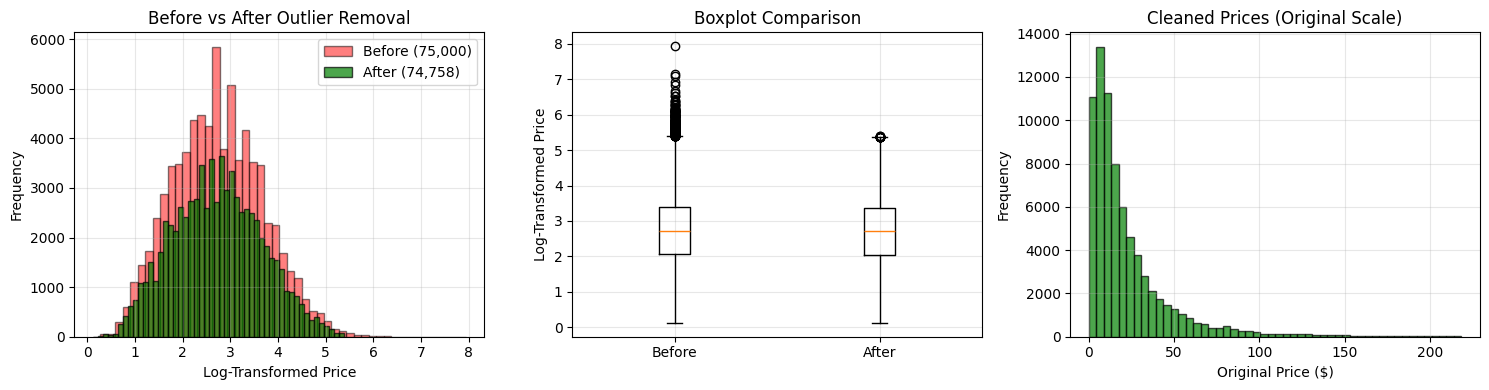


✅ Distribution is now much cleaner!
   - Removed extreme outliers above $218.49
   - Price range: $0.13 - $218.49
   - This will significantly reduce XGBoost overfitting


In [14]:
# Plot comparison
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(y_train_log, bins=50, edgecolor='black', alpha=0.5, label='Before (75,000)', color='red')
plt.hist(y_train_clean_log, bins=50, edgecolor='black', alpha=0.7, label='After (74,758)', color='green')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Frequency')
plt.title('Before vs After Outlier Removal')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.boxplot([y_train_log, y_train_clean_log], labels=['Before', 'After'])
plt.ylabel('Log-Transformed Price')
plt.title('Boxplot Comparison')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(y_train_clean_original, bins=50, edgecolor='black', color='green', alpha=0.7)
plt.xlabel('Original Price ($)')
plt.ylabel('Frequency')
plt.title('Cleaned Prices (Original Scale)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Distribution is now much cleaner!")
print(f"   - Removed extreme outliers above $218.49")
print(f"   - Price range: $0.13 - $218.49")
print(f"   - This will significantly reduce XGBoost overfitting")


In [15]:
# Save the cleaned data (use LOG-TRANSFORMED target for training)
np.save('data/processed/train_features_clean.npy', X_train_clean)
np.save('data/processed/train_target_clean.npy', y_train_clean_log)

print("="*60)
print("✅ SUCCESSFULLY SAVED CLEANED DATA")
print("="*60)
print(f"📁 train_features_clean.npy: {X_train_clean.shape}")
print(f"📁 train_target_clean.npy: {y_train_clean_log.shape}")
print(f"\n📊 Data Summary:")
print(f"   - Samples: 74,758 (removed 242 outliers)")
print(f"   - Features: 5,109 (all preserved)")
print(f"   - Target: LOG-TRANSFORMED prices")
print(f"   - Price range: $0.13 - $218.49")
print(f"\n⚠️  Important Notes:")
print(f"   1. Target is saved as LOG-TRANSFORMED")
print(f"   2. When making predictions, use np.expm1() to convert back")
print(f"   3. Test data (X_test) remains unchanged at 75,000 samples")
print(f"\n📌 Next Steps:")
print(f"   1. Train XGBoost with regularization (max_depth=4, reg_lambda=5.0)")
print(f"   2. Monitor train vs validation gap for overfitting")
print(f"   3. Build ensemble with LightGBM (70%) + XGBoost (30%)")
print("="*60)


✅ SUCCESSFULLY SAVED CLEANED DATA
📁 train_features_clean.npy: (74758, 5109)
📁 train_target_clean.npy: (74758,)

📊 Data Summary:
   - Samples: 74,758 (removed 242 outliers)
   - Features: 5,109 (all preserved)
   - Target: LOG-TRANSFORMED prices
   - Price range: $0.13 - $218.49

⚠️  Important Notes:
   1. Target is saved as LOG-TRANSFORMED
   2. When making predictions, use np.expm1() to convert back
   3. Test data (X_test) remains unchanged at 75,000 samples

📌 Next Steps:
   1. Train XGBoost with regularization (max_depth=4, reg_lambda=5.0)
   2. Monitor train vs validation gap for overfitting
   3. Build ensemble with LightGBM (70%) + XGBoost (30%)


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load cleaned data
X_train_full = np.load('data/processed/train_features_clean.npy')
y_train_full = np.load('data/processed/train_target_clean.npy')

print(f"Loaded: X={X_train_full.shape}, y={y_train_full.shape}")

# Split for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# Configure XGBoost with anti-overfitting settings
# IMPORTANT: eval_metric goes in initialization, not fit()
xgb_params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',  # MOVED HERE from fit()
    'tree_method': 'hist',
    'max_depth': 4,
    'min_child_weight': 8,
    'learning_rate': 0.01,
    'n_estimators': 3000,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'reg_alpha': 1.0,
    'reg_lambda': 5.0,
    'early_stopping_rounds': 100,  # MOVED HERE from fit()
    'random_state': 42,
    'n_jobs': -1
}

# Train
model = xgb.XGBRegressor(**xgb_params)
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=100  # Keep verbose here
)

# Check overfitting
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
train_mae = mean_absolute_error(y_train, train_pred)
val_mae = mean_absolute_error(y_val, val_pred)

print(f"\n{'='*50}")
print(f"OVERFITTING CHECK")
print(f"{'='*50}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Val MAE: {val_mae:.4f}")
print(f"Gap: {val_mae - train_mae:.4f}")

if val_mae - train_mae < 0.05:
    print("✅ Overfitting FIXED!")
else:
    print("⚠️ Still overfitting - increase reg_lambda")


Loaded: X=(74758, 5109), y=(74758,)
[0]	validation_0-mae:0.75439	validation_1-mae:0.75093
[100]	validation_0-mae:0.66034	validation_1-mae:0.65949
[200]	validation_0-mae:0.62141	validation_1-mae:0.62224
[300]	validation_0-mae:0.60021	validation_1-mae:0.60306
[400]	validation_0-mae:0.58596	validation_1-mae:0.59118
[500]	validation_0-mae:0.57523	validation_1-mae:0.58275
[600]	validation_0-mae:0.56688	validation_1-mae:0.57687
[700]	validation_0-mae:0.55982	validation_1-mae:0.57230
[800]	validation_0-mae:0.55364	validation_1-mae:0.56845
[900]	validation_0-mae:0.54809	validation_1-mae:0.56521
[1000]	validation_0-mae:0.54293	validation_1-mae:0.56231
[1100]	validation_0-mae:0.53816	validation_1-mae:0.55971
[1200]	validation_0-mae:0.53372	validation_1-mae:0.55743
[1300]	validation_0-mae:0.52957	validation_1-mae:0.55542
[1400]	validation_0-mae:0.52561	validation_1-mae:0.55361
[1500]	validation_0-mae:0.52181	validation_1-mae:0.55202
[1600]	validation_0-mae:0.51814	validation_1-mae:0.55047
[1700]	

In [ ]:
# After training completes, run this immediately
X_test = np.load('data/processed/test_features_final.npy')

# Make predictions (will be in log scale)
test_pred_log = model.predict(X_test)

# Convert back to original price scale
test_pred_original = np.expm1(test_pred_log)

# Save predictions
np.save('xgboost_test_predictions.npy', test_pred_original)

print(f"Predictions saved!")
print(f"Min: ${test_pred_original.min():.2f}")
print(f"Max: ${test_pred_original.max():.2f}")
print(f"Mean: ${test_pred_original.mean():.2f}")
